In [1]:
!pip install -q efficientnet

In [2]:
# !lscpu  # Displays CPU model and details
# !free -h  # Shows total RAM


In [3]:
# import sys
# print(sys.version)


In [4]:
# !nvidia-smi  # Shows GPU details and CUDA version
# !nvcc --version  # Displays CUDA version


In [5]:
import tensorflow as tf
import numpy as np
import pickle
import cv2
from os import listdir
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, Conv2D,MaxPooling2D, Activation, Flatten, Dropout, Dense
# from keras.layers.convolutional import Conv2D
# from keras.layers.convolutional import MaxPooling2D
# from keras.layers.core import Activation, Flatten, Dropout, Dense
from keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
os.listdir("/kaggle/input/customized-whole-dataset/bd_plant_diseases_all_classes")

['All Classes']

In [6]:
import os
import gc
import re

import cv2
import math
import numpy as np
import scipy as sp
import pandas as pd

import tensorflow as tf
from IPython.display import SVG
import efficientnet.tfkeras as efn
from keras.utils import plot_model
import tensorflow.keras.layers as L
from keras.utils import model_to_dot
import tensorflow.keras.backend as K
from tensorflow.keras.models import Model
from kaggle_datasets import KaggleDatasets
from tensorflow.keras.applications import DenseNet121

import seaborn as sns
from tqdm import tqdm
import matplotlib.cm as cm
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

tqdm.pandas()
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

np.random.seed(0)
tf.random.set_seed(0)

import warnings
warnings.filterwarnings("ignore")

In [7]:
EPOCHS = 100
INIT_LR = 1e-3
BS = 32
default_image_size = tuple((75,75))
image_size = 0
directory_root = '/kaggle/input/customized-whole-dataset/bd_plant_diseases_all_classes'
width=75
height=75
depth=3

In [8]:
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, default_image_size)
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None
image_list, label_list, directory_list = [], [], []
try:
    print("[INFO] Loading images ...")
    root_dir = listdir(directory_root)
    for directory in root_dir :
        # remove .DS_Store from list
        if directory == ".DS_Store" :
            root_dir.remove(directory)

    for plant_folder in root_dir :
        plant_disease_folder_list = listdir(f"{directory_root}/{plant_folder}")

        for disease_folder in plant_disease_folder_list :
            # remove .DS_Store from list
            if disease_folder == ".DS_Store" :
                plant_disease_folder_list.remove(disease_folder)

        for plant_disease_folder in plant_disease_folder_list:
            print(f"[INFO] Processing {plant_disease_folder} ...")
            plant_disease_image_list = listdir(f"{directory_root}/{plant_folder}/{plant_disease_folder}/")

            for single_plant_disease_image in plant_disease_image_list :
                if single_plant_disease_image == ".DS_Store" :
                    plant_disease_image_list.remove(single_plant_disease_image)

            for image in plant_disease_image_list:
                image_directory = f"{directory_root}/{plant_folder}/{plant_disease_folder}/{image}"
                if image_directory.endswith(".jpg") == True or image_directory.endswith(".jpeg") == True:
                    directory_list.append(image_directory)
                    image_list.append(convert_image_to_array(image_directory))
                    label_list.append(plant_disease_folder)
                else:
                    print(image_directory)
    print("[INFO] Image loading completed")
except Exception as e:
    print(f"Error --- : {e}")

[INFO] Loading images ...
[INFO] Processing EggPlant_Insect_Pest_Disease ...
[INFO] Processing Tomato_Yellow_Leaf_Curl_Virus ...
[INFO] Processing EggPlant_Wilt_Disease ...
[INFO] Processing Corn_healthy ...
[INFO] Processing Tomato_Leaf_Mold ...
[INFO] Processing Potato_Late_blight ...
[INFO] Processing Wheat_Yellow_Rust ...
[INFO] Processing Tomato_Bacterial_spot ...
[INFO] Processing Corn_Northern_Leaf_Blight ...
[INFO] Processing Potato_healthy ...
[INFO] Processing EggPlant_Leaf_Spot_Disease ...
[INFO] Processing Tomato_Septoria_leaf_spot ...
[INFO] Processing Tomato_healthy ...
[INFO] Processing Wheat_Brown_Rust ...
[INFO] Processing Cauliflower_Bacterial_spot_rot ...
[INFO] Processing Cauliflower_Healthy ...
[INFO] Processing Rice_Brown_spot ...
[INFO] Processing Cauliflower_Black_Rot ...
[INFO] Processing Wheat_Healthy ...
[INFO] Processing Tomato_Early_blight ...
[INFO] Processing Cauliflower_Downy_Mildew ...
[INFO] Processing Tomato_Target_Spot ...
[INFO] Processing Rice_Leaf

In [9]:
for plant_disease_folder in plant_disease_folder_list:
            print(f"[INFO] Processing {plant_disease_folder} ...")
            plant_disease_image_list = listdir(f"{directory_root}/{plant_folder}/{plant_disease_folder}/")

            for single_plant_disease_image in plant_disease_image_list :
                if single_plant_disease_image == ".DS_Store" :
                    plant_disease_image_list.remove(single_plant_disease_image)

[INFO] Processing EggPlant_Insect_Pest_Disease ...
[INFO] Processing Tomato_Yellow_Leaf_Curl_Virus ...
[INFO] Processing EggPlant_Wilt_Disease ...
[INFO] Processing Corn_healthy ...
[INFO] Processing Tomato_Leaf_Mold ...
[INFO] Processing Potato_Late_blight ...
[INFO] Processing Wheat_Yellow_Rust ...
[INFO] Processing Tomato_Bacterial_spot ...
[INFO] Processing Corn_Northern_Leaf_Blight ...
[INFO] Processing Potato_healthy ...
[INFO] Processing EggPlant_Leaf_Spot_Disease ...
[INFO] Processing Tomato_Septoria_leaf_spot ...
[INFO] Processing Tomato_healthy ...
[INFO] Processing Wheat_Brown_Rust ...
[INFO] Processing Cauliflower_Bacterial_spot_rot ...
[INFO] Processing Cauliflower_Healthy ...
[INFO] Processing Rice_Brown_spot ...
[INFO] Processing Cauliflower_Black_Rot ...
[INFO] Processing Wheat_Healthy ...
[INFO] Processing Tomato_Early_blight ...
[INFO] Processing Cauliflower_Downy_Mildew ...
[INFO] Processing Tomato_Target_Spot ...
[INFO] Processing Rice_Leaf_smut ...
[INFO] Processin

In [10]:
label_binarizer = LabelBinarizer()
image_labels = label_binarizer.fit_transform(label_list)
pickle.dump(label_binarizer,open('label_transform.pkl', 'wb'))
n_classes = len(label_binarizer.classes_)
print(label_binarizer.classes_)

['Cauliflower_Bacterial_spot_rot' 'Cauliflower_Black_Rot'
 'Cauliflower_Downy_Mildew' 'Cauliflower_Healthy'
 'Corn_Cercospora_leaf_spot_(Gray_leaf_spot)' 'Corn_Common_rust'
 'Corn_Northern_Leaf_Blight' 'Corn_healthy' 'EggPlant_Healthy_Leaf'
 'EggPlant_Insect_Pest_Disease' 'EggPlant_Leaf_Spot_Disease'
 'EggPlant_Mosaic_Virus_Disease' 'EggPlant_Small_Leaf_Disease'
 'EggPlant_White_Mold_Disease' 'EggPlant_Wilt_Disease'
 'Potato_Early_blight' 'Potato_Late_blight' 'Potato_healthy'
 'Rice_Bacterial_leaf_blight' 'Rice_Brown_spot' 'Rice_Healthy'
 'Rice_Leaf_smut' 'Tomato_Bacterial_spot' 'Tomato_Early_blight'
 'Tomato_Late_blight' 'Tomato_Leaf_Mold' 'Tomato_Septoria_leaf_spot'
 'Tomato_Spider_mites Two-spotted_spider_mite' 'Tomato_Target_Spot'
 'Tomato_Yellow_Leaf_Curl_Virus' 'Tomato_healthy' 'Tomato_mosaic_virus'
 'Wheat_Brown_Rust' 'Wheat_Healthy' 'Wheat_Yellow_Rust']


In [11]:
np_image_list = np.array(image_list, dtype=np.float16) / 255.0
print("[INFO] Spliting data to train, test")
x_train, x_test, y_train, y_test = train_test_split(np_image_list, image_labels, test_size=0.15, random_state = 42)

[INFO] Spliting data to train, test


In [12]:
x_train.shape,x_test.shape

((25991, 75, 75, 3), (4587, 75, 75, 3))

In [13]:
aug = ImageDataGenerator(
    rotation_range=25, width_shift_range=0.1,
    height_shift_range=0.1, shear_range=0.2,
    zoom_range=0.2,horizontal_flip=True,
    fill_mode="nearest")

In [14]:
import tensorflow as tf
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                     min_delta=0.0001,
                                     patience=10,
                                     mode="auto",
                                     verbose = 1)
]

In [15]:
len(image_list)

30578

# **Our Model**

In [16]:
def Res_Plot_Test_Save(name):
    print("[INFO] Calculating model accuracy")
    scores = model.evaluate(x_test, y_test)
    print(f"Test Accuracy: {scores[1]*100}")
    print("[INFO] Saving model")
    model.save(name)

In [17]:
# def display_training_curves(training, validation, yaxis):
#     ylabel = "{}".format(yaxis)
#     title = "{} vs. Epochs".format(yaxis)

#     fig = go.Figure()

#     fig.add_trace(
#         go.Scatter(x=np.arange(1, EPOCHS+1), mode='lines+markers', y=training, marker=dict(color="dodgerblue"),
#                name="Train"))

#     fig.add_trace(
#         go.Scatter(x=np.arange(1, EPOCHS+1), mode='lines+markers', y=validation, marker=dict(color="darkorange"),
#                name="Val"))

#     fig.update_layout(title_text=title, yaxis_title=ylabel, xaxis_title="Epochs", template="plotly_white")
#     fig.show()

In [18]:
def recall_m(y_true, y_pred):
    y_true = K.cast(y_true, 'float32') 
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    y_true = K.cast(y_true, 'float32') 
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    y_true = K.cast(y_true, 'float32') 
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [19]:
# def create_model():
model = tf.keras.backend.clear_session()
model = None
model = Sequential()
inputShape = (height, width, depth)
chanDim = -1
if K.image_data_format() == "channels_first":
    inputShape = (depth, height, width)
    chanDim = 1
model.add(Conv2D(32, (3, 3), padding="same",input_shape=inputShape))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))
# model.add(Dropout(0.5))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
# model.add(Dropout(0.5))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Dropout(0.5))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
# model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(n_classes))
model.add(Activation("softmax"))
opt = Adam(learning_rate=INIT_LR, decay=INIT_LR / EPOCHS)
# distribution

# model.compile(loss="binary_crossentropy", optimizer=opt, metrics=[tf.keras.metrics.Precision(), tf.keras.metrics.Accuracy()])
# model.compile(loss="binary_crossentropy", optimizer=opt, metrics=['accuracy', f1_m,  precision_m, recall_m])
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=['accuracy', f1_m,  precision_m, recall_m])



In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 75, 75, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 75, 75, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 25, 25, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 25, 25, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 25, 25, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 25, 25, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 25, 25, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 25, 25, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 25, 25, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 25, 25, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 12, 12, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 12, 12, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 5,039,011 (19.22 MB)

 Trainable params: 5,036,131 (19.21 MB)

 Non-trainable params: 2,880 (11.25 KB)

In [21]:
# plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [22]:
# # train the network
# print("[INFO] training network...")
# history = model.fit(
#     aug.flow(x_train, y_train, batch_size=BS),
#     validation_data=(x_test, y_test),
#     steps_per_epoch=len(x_train) // BS,
#     epochs=250
#     )

In [23]:
# # evaluate the model
# loss, accuracy, f1_score, precision, recall = model.evaluate(x_test, y_test, verbose=0)
# print("Accuracy: {} \nLoss:{} \nF1_score: {} \nPrecision: {} \nRecall: {}".format(accuracy, loss, f1_score, precision, recall))

In [24]:
model.evaluate(x_test, y_test, verbose=0)

[3.5614030361175537, 0.030521037057042122, 0.0, 0.0, 0.0]

In [25]:
# Define the ModelCheckpoint callback
checkpoint = tf.keras.callbacks.ModelCheckpoint('model.keras', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

# Train the network
history = model.fit(
    aug.flow(x_train, y_train, batch_size=BS),
    validation_data=(x_test, y_test),
    steps_per_epoch=len(x_train) // BS,
    epochs=250,
    callbacks=[checkpoint]
)


Epoch 1/250
810/812 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.5490 - f1_m: 0.5434 - loss: 1.7331 - precision_m: 0.6719 - recall_m: 0.4644
Epoch 1: val_accuracy improved from -inf to 0.49727, saving model to model.keras
812/812 ━━━━━━━━━━━━━━━━━━━━ 57s 57ms/step - accuracy: 0.5493 - f1_m: 0.5437 - loss: 1.7315 - precision_m: 0.6721 - recall_m: 0.4648 - val_accuracy: 0.4973 - val_f1_m: 0.5025 - val_loss: 2.7936 - val_precision_m: 0.5401 - val_recall_m: 0.4706
Epoch 2/250
  1/812 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.7500 - f1_m: 0.7241 - loss: 0.7492 - precision_m: 0.8077 - recall_m: 0.6562
Epoch 2: val_accuracy improved from 0.49727 to 0.49771, saving model to model.keras
812/812 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7500 - f1_m: 0.7241 - loss: 0.7492 - precision_m: 0.8077 - recall_m: 0.6562 - val_accuracy: 0.4977 - val_f1_m: 0.5034 - val_loss: 2.8374 - val_precision_m: 0.5400 - val_recall_m: 0.4723
Epoch 3/250
811/812 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accurac

In [26]:
from keras.models import load_model

# Load the best model
model = load_model('model.keras', custom_objects={'f1_m': f1_m, 'precision_m': precision_m, 'recall_m': recall_m})

# Evaluate on the test set
loss, accuracy, f1_score, precision, recall = model.evaluate(x_test, y_test, verbose=0)
print(f"Loss: {loss:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1_score:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")


Loss: 0.0997
Accuracy: 0.9719
F1 Score: 0.9724
Precision: 0.9735
Recall: 0.9714


In [27]:
# history.history

In [28]:
def precision_m(y_true, y_pred):
    y_true = K.cast(y_true, 'float32') 
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Shape of y_test: (4587,)
Shape of y_pred: (4587,)


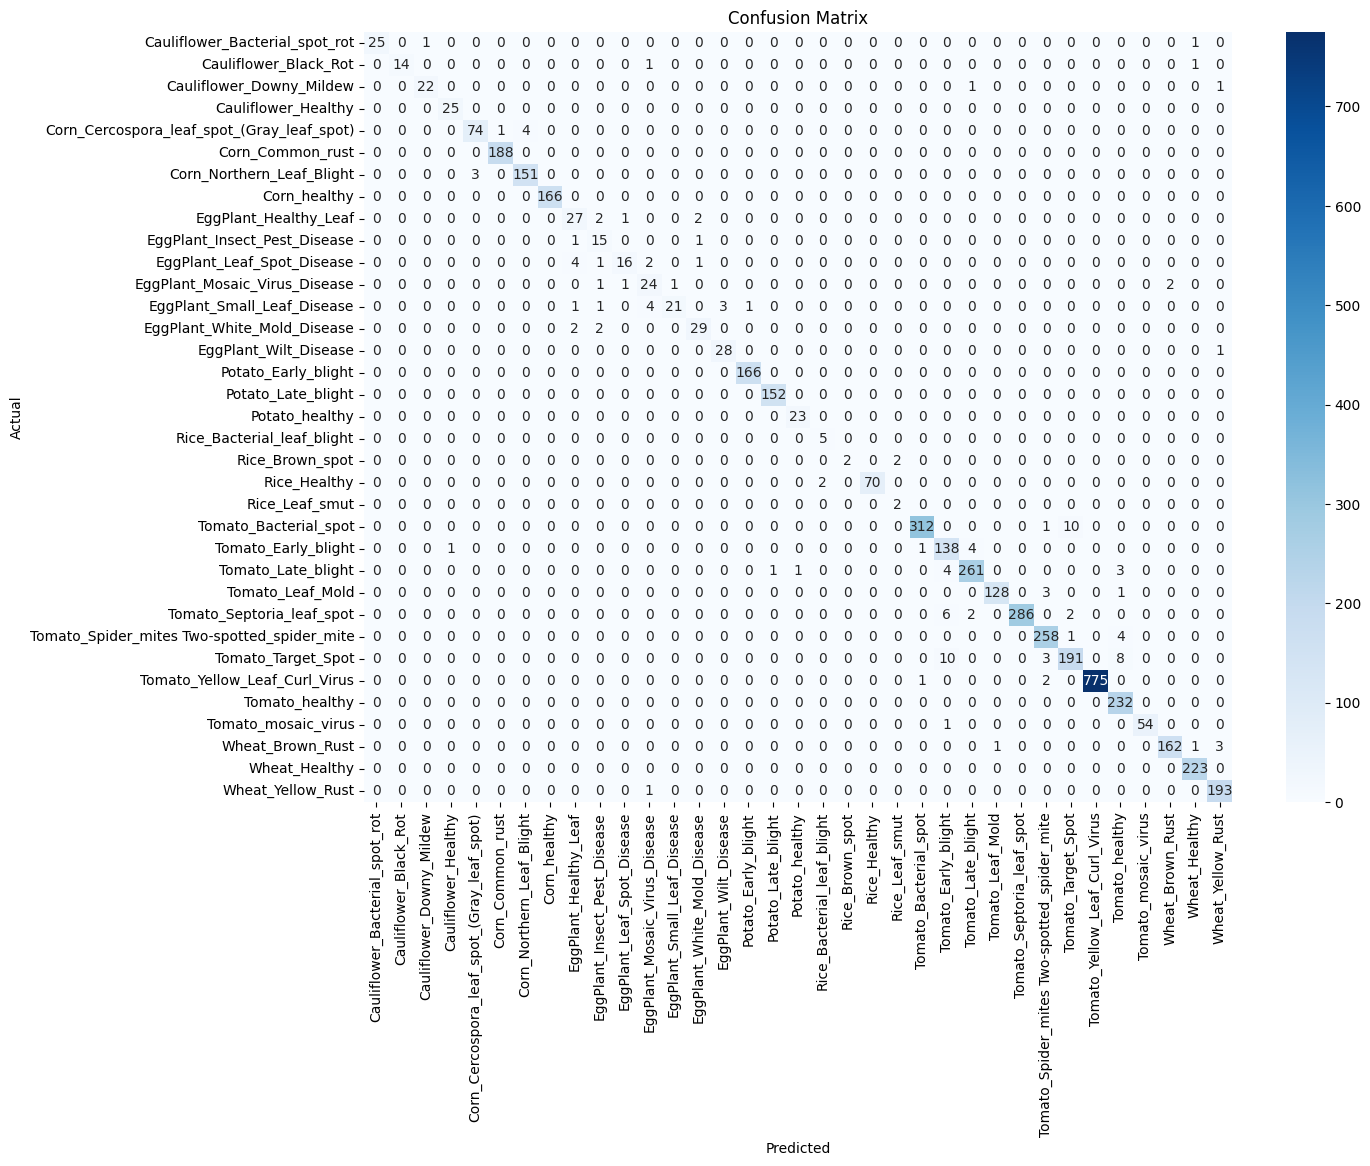

Confusion Matrix:
[[ 25   0   1 ...   0   1   0]
 [  0  14   0 ...   0   1   0]
 [  0   0  22 ...   0   0   1]
 ...
 [  0   0   0 ... 162   1   3]
 [  0   0   0 ...   0 223   0]
 [  0   0   0 ...   0   0 193]]
Confusion matrix saved at: /kaggle/working/confusion_matrix_last.png


In [51]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming you already have `y_test` (true labels) and `y_pred_prob` (predicted probabilities)
y_pred = model.predict(x_test)  # Get predictions

# Convert multi-dimensional outputs to class labels if necessary
if y_test.ndim > 1:
    y_test = np.argmax(y_test, axis=1)  # Convert from one-hot encoded labels to class labels
if y_pred.ndim > 1:
    y_pred = np.argmax(y_pred, axis=1)  # Get the predicted class label for each sample

# Print shapes to confirm they're 1D
print("Shape of y_test:", y_test.shape)  # Should be (4587,)
print("Shape of y_pred:", y_pred.shape)  # Should be (4587,)

# Now, calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create the plot with proper axis handling
fig, ax = plt.subplots(figsize=(14, 10))  # Create a figure and axis
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=label_binarizer.classes_, yticklabels=label_binarizer.classes_, ax=ax)

# Set plot labels and title
ax.set_title("Confusion Matrix")
ax.set_ylabel("Actual")
ax.set_xlabel("Predicted")

# Save the plot
save_path = "/kaggle/working/confusion_matrix_last.png"
fig.savefig(save_path, dpi=700, bbox_inches="tight")

# Optionally, display the plot
plt.show()

# Optionally, print confusion matrix as raw array
print("Confusion Matrix:")
print(cm)

print(f"Confusion matrix saved at: {save_path}")


In [32]:
save_path = "/kaggle/working/confusion_matrixxx.png"
plt.savefig(save_path, dpi=300, bbox_inches="tight")

<Figure size 640x480 with 0 Axes>

In [33]:
print(f"y_test shape: {y_test.shape}, y_test type: {type(y_test[0])}")
print(f"y_pred shape: {y_pred.shape}, y_pred type: {type(y_pred[0])}")
if y_test.ndim > 1:
    y_test = np.argmax(y_test, axis=1)
if y_pred.ndim > 1:
    y_pred = np.argmax(y_pred, axis=1)

y_test shape: (4587,), y_test type: <class 'numpy.int64'>
y_pred shape: (4587,), y_pred type: <class 'numpy.int64'>


## Predicting on a single image

In [34]:
# Save the model in HDF5 format (standard TensorFlow/Keras model format)
model.save('path_to_save/PlantCareNet.h5')




In [35]:
y_test.shape

(4587,)

In [36]:
plt.savefig("/kaggle/working/confusion_matrix.png", dpi=300, bbox_inches="tight")



<Figure size 640x480 with 0 Axes>

/kaggle/input/customized-whole-dataset/bd_plant_diseases_all_classes/All Classes/EggPlant_Mosaic_Virus_Disease/Mosaic-Virus-1-_jpg.rf.bd82b6c570b31d283ca4af86975961e1.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 741ms/step


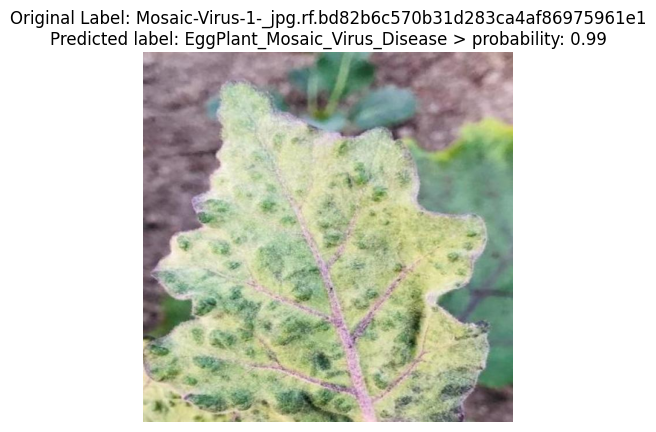

In [37]:
from random import randint

image_dir= "/kaggle/input/customized-whole-dataset/bd_plant_diseases_all_classes/All Classes/EggPlant_Mosaic_Virus_Disease/Mosaic-Virus-1-_jpg.rf.bd82b6c570b31d283ca4af86975961e1.jpg"
print(image_dir)
index1 = image_dir.rfind('/')
index2 = image_dir.rfind('.')
Image1 = plt.imread(image_dir)

im=convert_image_to_array(image_dir)
np_image_li = np.array(im, dtype=np.float16) / 225.0
npp_image = np.expand_dims(np_image_li, axis=0)
result=model.predict(npp_image)
itemindex = np.where(result==np.max(result))
# print("probability:"+str(np.max(result))+"\n"+label_binarizer.classes_[itemindex[1][0]])
# showing image
plt.imshow(Image1)
plt.axis('off')
plt.title("Original Label: "+image_dir[index1+1:index2]+"\n"+"Predicted label: "+label_binarizer.classes_[itemindex[1][0]]+" > probability: "+str(np.max(result))[:4])
plt.show()

## Calculating Inference time

In [38]:
import time
import numpy as np

# Convert x_test to a TensorFlow dataset for efficient batch processing
test_dataset = tf.data.Dataset.from_tensor_slices(x_test).batch(32)  # Adjust batch size as needed

# List to store inference times for each batch
inference_times = []

# Run inference on each batch in the dataset
for input_batch in test_dataset:
    start_time = time.time()
    _ = model(input_batch, training=False)  # Forward pass (inference)
    end_time = time.time()
    
    # Calculate and store time taken for this batch
    inference_times.append(end_time - start_time)

# Calculate average inference time per batch and per sample
average_inference_time_per_batch = np.mean(inference_times)
print(f"Average Inference Time per batch: {average_inference_time_per_batch:.6f} seconds")

# Per-sample inference time
batch_size = input_batch.shape[0]  # Assuming all batches are the same size
average_inference_time_per_sample = average_inference_time_per_batch / batch_size
print(f"Average Inference Time per sample: {average_inference_time_per_sample:.6f} seconds")
3

Average Inference Time per batch: 0.023630 seconds
Average Inference Time per sample: 0.002148 seconds


3

In [39]:
import os

# Get the file size of the saved model
model_size = os.path.getsize('model.keras') / (1024 * 1024)  # Convert to MB
print(f"Model size: {model_size:.2f} MB")

Model size: 57.75 MB


In [40]:
class_names= [
    "Cauliflower Bacterial spot rot", "Cauliflower Black Rot", "Cauliflower Downy Mildew", 
    "Cauliflower Healthy", "Corn Cercospora leaf spot (Gray leaf spot)", "Corn Common rust", 
    "Corn Northern Leaf Blight", "Corn healthy", "EggPlant Healthy Leaf", "EggPlant Insect Pest Disease", 
    "EggPlant Leaf Spot Disease", "EggPlant Mosaic Virus Disease", "EggPlant Small Leaf Disease", 
    "EggPlant White Mold Disease", "EggPlant Wilt Disease", "Potato Early blight", "Potato Late blight", 
    "Potato healthy", "Rice Bacterial leaf blight", "Rice Brown spot", "Rice Healthy", "Rice Leaf smut", 
    "Tomato Bacterial spot", "Tomato Early blight", "Tomato Late blight", "Tomato Leaf Mold", 
    "Tomato Septoria leaf spot", "Tomato Spider mites Two-spotted spider mite", "Tomato Target Spot", 
    "Tomato Yellow Leaf Curl Virus", "Tomato healthy", "Tomato mosaic virus", "Wheat Brown Rust", 
    "Wheat Healthy", "Wheat Yellow Rust"
]


In [41]:
# import matplotlib.pyplot as plt
# from sklearn.metrics import roc_curve, auc
# from sklearn.preprocessing import label_binarize

# # Assuming you have 35 classes and your `class_names` list is already defined
# n_classes = 35

# # Binarize the labels for multiclass ROC
# y_test_bin = label_binarize(y_test, classes=range(n_classes))  # Binarize with 35 classes
# y_pred_prob = model.predict(x_test)  # Get predicted probabilities

# # Plot ROC curve for each class
# plt.figure(figsize=(14, 12))


# for i in range(n_classes):
#     fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
#     roc_auc = auc(fpr, tpr)
#     plt.plot(fpr, tpr, lw=2, label=f'{class_names[i]} (AUC = {roc_auc:.2f})')

# # Plot random chance line
# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve for Multiclass Classification')
# plt.legend(loc='lower right', fontsize=8)
# plt.show()


144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


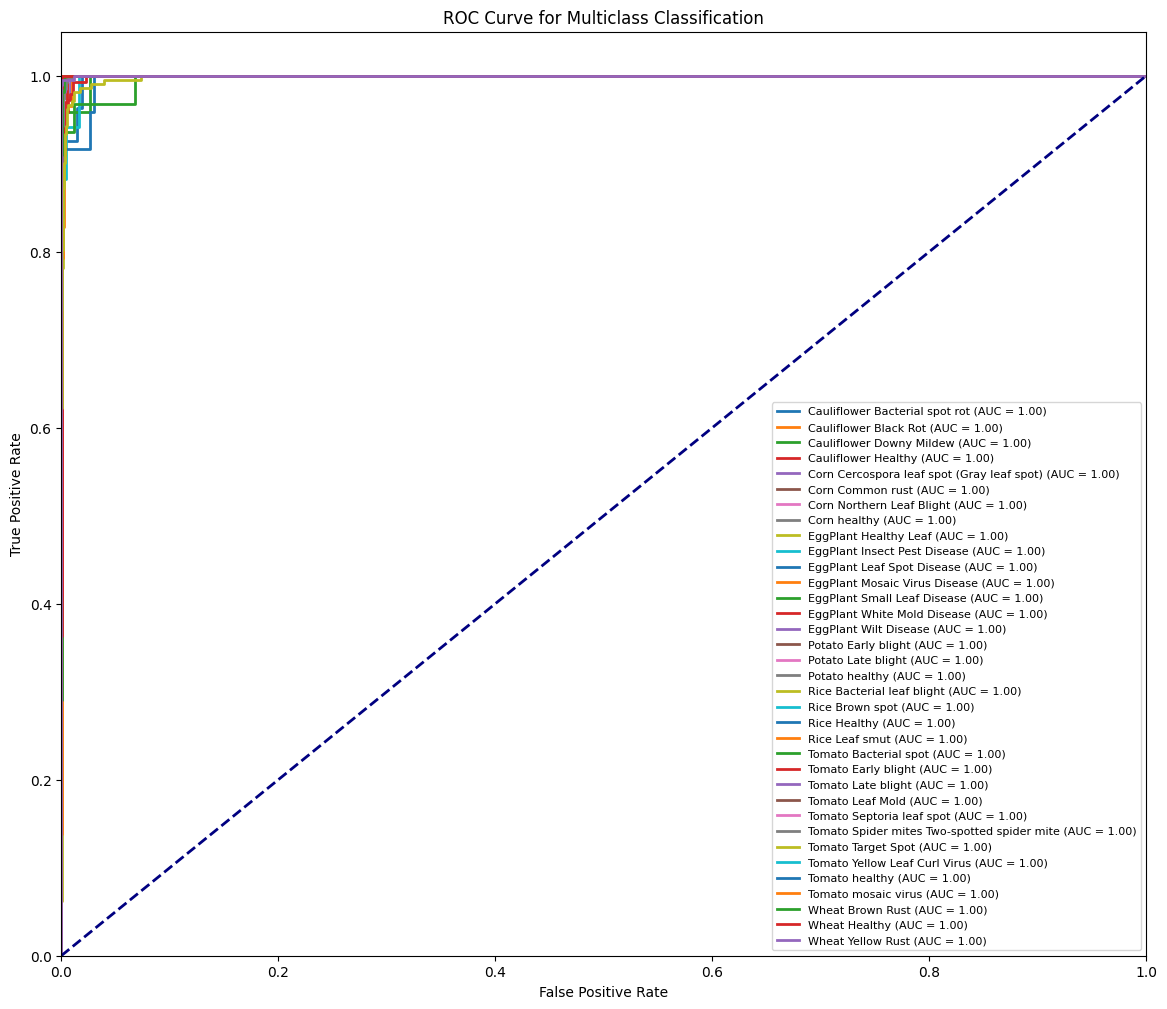

ROC curve saved at: /kaggle/working/roc_curve_multiclass_final.png


In [52]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Assuming you have 35 classes and your `class_names` list is already defined
n_classes = 35

# Binarize the labels for multiclass ROC
y_test_bin = label_binarize(y_test, classes=range(n_classes))  # Binarize with 35 classes
y_pred_prob = model.predict(x_test)  # Get predicted probabilities

# Create the plot with proper axis handling
fig, ax = plt.subplots(figsize=(14, 12))  # Create figure and axis

# Plot ROC curve for each class
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    ax.plot(fpr, tpr, lw=2, label=f'{class_names[i]} (AUC = {roc_auc:.2f})')

# Plot random chance line
ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curve for Multiclass Classification')
ax.legend(loc='lower right', fontsize=8)

# Save the figure
save_path = "/kaggle/working/roc_curve_multiclass_final.png"
fig.savefig(save_path, dpi=700, bbox_inches="tight")

# Optionally, display the plot
plt.show()

print(f"ROC curve saved at: {save_path}")


In [43]:
# Save the figure
save_path = "/kaggle/working/roc_curve.jpg"
plt.savefig(save_path, dpi=300, bbox_inches="tight")


<Figure size 640x480 with 0 Axes>

In [44]:
from sklearn.metrics import classification_report

# Get the predicted class labels (use argmax for multiclass)
y_pred_classes = y_pred_prob.argmax(axis=-1)

# Print the classification report with class names
report = classification_report(y_test, y_pred_classes, target_names=class_names)
print(report)


                                             precision    recall  f1-score   support

             Cauliflower Bacterial spot rot       1.00      0.93      0.96        27
                      Cauliflower Black Rot       1.00      0.88      0.93        16
                   Cauliflower Downy Mildew       0.96      0.92      0.94        24
                        Cauliflower Healthy       0.96      1.00      0.98        25
 Corn Cercospora leaf spot (Gray leaf spot)       0.96      0.94      0.95        79
                           Corn Common rust       0.99      1.00      1.00       188
                  Corn Northern Leaf Blight       0.97      0.98      0.98       154
                               Corn healthy       1.00      1.00      1.00       166
                      EggPlant Healthy Leaf       0.77      0.84      0.81        32
               EggPlant Insect Pest Disease       0.68      0.88      0.77        17
                 EggPlant Leaf Spot Disease       0.89      0.67

In [45]:
history.history

{'accuracy': [0.6323432922363281,
  0.75,
  0.7417080998420715,
  0.71875,
  0.7737200856208801,
  0.75,
  0.7916714549064636,
  0.84375,
  0.8120112419128418,
  0.84375,
  0.8334296345710754,
  0.84375,
  0.8536153435707092,
  0.875,
  0.8573134541511536,
  0.9375,
  0.8647482395172119,
  0.75,
  0.8667899370193481,
  0.78125,
  0.8850880265235901,
  0.84375,
  0.8912515640258789,
  0.90625,
  0.8977233171463013,
  0.9375,
  0.8972610831260681,
  0.90625,
  0.9092029929161072,
  0.96875,
  0.9013059139251709,
  0.90625,
  0.9093570709228516,
  0.9375,
  0.9182171821594238,
  0.9375,
  0.9201048016548157,
  0.8125,
  0.9176008105278015,
  0.90625,
  0.9236873388290405,
  0.875,
  0.9255363941192627,
  0.9375,
  0.9309680461883545,
  0.8125,
  0.9286952614784241,
  1.0,
  0.9261142611503601,
  0.96875,
  0.9346662163734436,
  0.96875,
  0.9353595972061157,
  0.9375,
  0.9392503499984741,
  1.0,
  0.9391733407974243,
  0.90625,
  0.938556969165802,
  0.9375,
  0.9435263276100159,
  0.937

In [48]:
def display_training_curves(training, validation, yaxis):
    ylabel = "{}".format(yaxis)
    title = "{} vs. Epochs".format(yaxis)

    fig = go.Figure()

    # Use the length of training data to determine x-axis
    epochs = len(training)

    fig.add_trace(
        go.Scatter(x=np.arange(1, epochs + 1), mode='lines+markers', y=training,
                   marker=dict(color="dodgerblue"), name="Train")
    )

    fig.add_trace(
        go.Scatter(x=np.arange(1, epochs + 1), mode='lines+markers', y=validation,
                   marker=dict(color="darkorange"), name="Val")
    )

    fig.update_layout(title_text=title, yaxis_title=ylabel, xaxis_title="Epochs", template="plotly_white")
    fig.show()
# display_training_curves(
#     history.history['accuracy'],
#     history.history['val_accuracy'],
#     'accuracy')

In [49]:
display_training_curves(
    history.history['accuracy'],
    history.history['val_accuracy'],
    'accuracy')
display_training_curves(
    history.history['loss'],
    history.history['val_loss'],
    'loss')
display_training_curves(
    history.history['precision_m'],
    history.history['val_precision_m'],
    'precision')
display_training_curves(
    history.history['recall_m'],
    history.history['val_recall_m'],
    'recall')
display_training_curves(
    history.history['f1_m'],
    history.history['val_f1_m'],
    'f1 score')